## How Well Do Job And Skills Pay For Data Analyst Jobs?

### Steps...

1. Find the median salaries for the top 5 Data jobs.
2. Find the median salary per skill for Data Analyst jobs 
3. Plot the highest paying skills and most demanded skills

In [4]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Hide error message
from IPython.display import display
display()

# Cleaning the Data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # converting to the right time value
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills) # converting job_skills to a list

In [45]:
# filtering for UK Jobs and removing nan values in the sal_avg column
df_UK = df[df['job_country'] == 'United Kingdom'].dropna(subset=['salary_year_avg'])
df_UK 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,111175.0,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,147500.0,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783284,Senior Data Scientist,Senior Data Scientist,"Belfast, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-28 06:14:36,False,False,United Kingdom,year,157500.0,NaN,Axiom,"[sql, r, python, aws, redshift, spark, gitlab,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


In [46]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist() #to identify the top 5 data job roles in The UK
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [47]:
top_6 = df_UK[df_UK['job_title_short'].isin (job_titles)] # filtering only the top 6 jobs from the df_UK dataframe
top_6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,111175.0,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,147500.0,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783284,Senior Data Scientist,Senior Data Scientist,"Belfast, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-28 06:14:36,False,False,United Kingdom,year,157500.0,NaN,Axiom,"[sql, r, python, aws, redshift, spark, gitlab,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


In [48]:
top_6[['job_title_short', 'salary_year_avg']].sort_values(by='salary_year_avg', ascending= False)

,job_title_short,salary_year_avg
354185,Data Engineer,249000.0
747003,Data Scientist,205000.0
594111,Data Scientist,192000.0
74573,Data Scientist,192000.0
128603,Data Analyst,180000.0
...,...,...
623331,Data Analyst,43200.0
478542,Data Engineer,35000.0
158651,Data Scientist,33488.5
416083,Data Analyst,30000.0


In [49]:
top_6.groupby('job_title_short')['salary_year_avg'].count()

job_title_short
Data Analyst             72
Data Engineer            60
Data Scientist           75
Senior Data Analyst       8
Senior Data Engineer     24
Senior Data Scientist    31
Name: salary_year_avg, dtype: int64

In [50]:
job_order = top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

job_order 

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Senior Data Analyst',
       'Data Engineer', 'Data Scientist', 'Data Analyst'],
      dtype='object', name='job_title_short')

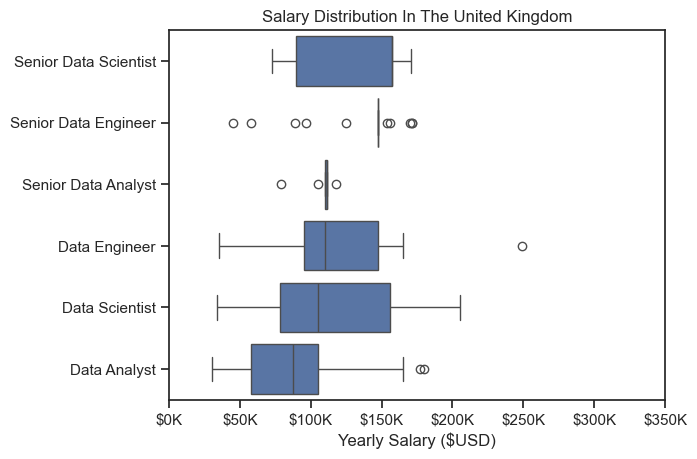

In [51]:
sns.boxplot(top_6, x= 'salary_year_avg', y= 'job_title_short', order= job_order)
plt.title('Salary Distribution In The United Kingdom')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}K'))
plt.xlim(0,350000)
plt.show()

## Investigate Median Salary Vs Skills For Data Analysts

In [52]:
df_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()
df_uk

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,NaN,Aon,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,[tableau],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784610,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,[excel],{'analyst_tools': ['excel']}
784707,Data Analyst,Forensic Data Analyst,United Kingdom,via Forensic.jobs,Full-time,False,United Kingdom,2023-10-11 06:11:04,True,False,United Kingdom,None,NaN,NaN,Premier Group Recruitment,None,None
784999,Data Analyst,HR Data Analyst,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Sainsbury's,None,None
785061,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Contractor,False,United Kingdom,2023-11-23 06:17:48,True,False,United Kingdom,None,NaN,NaN,Quooker UK,None,None


In [53]:
df_us = df_uk.dropna(subset= ['salary_year_avg'])
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
16526,Data Analyst,Portfolio Data Feeds - Associate Portfolio Dat...,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-24 13:11:25,False,False,United Kingdom,year,100500.0,NaN,Addepar,"[sql, jupyter]","{'libraries': ['jupyter'], 'programming': ['sq..."
25994,Data Analyst,Data Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-04 13:16:42,False,False,United Kingdom,year,105000.0,NaN,Informa Group Plc.,"[go, gdpr, dax]","{'analyst_tools': ['dax'], 'libraries': ['gdpr..."
30265,Data Analyst,Data & Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-03-24 13:22:35,True,False,United Kingdom,year,80850.0,NaN,Mention Me,"[go, bigquery, looker]","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
84680,Data Analyst,Data Analyst,"Stockport, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-23 00:12:17,True,False,United Kingdom,year,105000.0,NaN,NielsenIQ,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748172,Data Analyst,Healthcare Data Analyst,"Hemel Hempstead, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-03-01 20:26:22,False,False,United Kingdom,year,53014.0,NaN,NECSWS,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
758707,Data Analyst,Data Analyst- Gas & Power,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-14 20:16:23,False,False,United Kingdom,year,100500.0,NaN,Energy Aspects Ltd,"[python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
760011,Data Analyst,"Research Engineer, Science","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-28 21:00:41,False,False,United Kingdom,year,177283.0,NaN,DeepMind,"[python, c++, tensorflow, pytorch, numpy, pandas]","{'libraries': ['tensorflow', 'pytorch', 'numpy..."
762692,Data Analyst,Data Analyst - Manager Research,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-09 04:18:12,False,False,United Kingdom,year,51014.0,NaN,Redington,[excel],{'analyst_tools': ['excel']}


In [ ]:
df_uk = df_uk.explode('job_skills')
df_uk_top_pay = df_uk.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'median', ascending= False)
df_uk_top_pay = df_uk_top_pay.head(10)

df_uk_top_pay 

,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [55]:
df_uk_top_skills = df_uk.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
df_uk_top_skills = df_uk_top_skills.head(10).sort_values(by= 'median', ascending= False)
df_uk_top_skills = df_uk_top_skills.head(10)

df_uk_top_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
azure,6,92450.0
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


<function matplotlib.pyplot.show(close=None, block=None)>

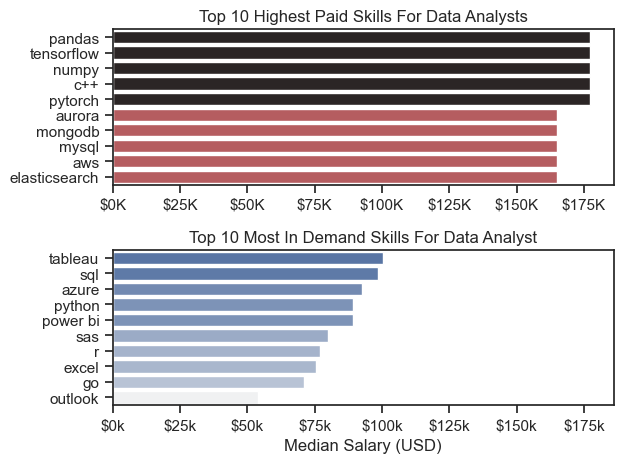

In [56]:
fig, ax= plt.subplots(2,1)
sns.set_theme(style= 'ticks')

# Highest paid skills
sns.barplot(df_uk_top_skills, x= 'median', y= df_uk_top_skills.index, hue= 'median', palette= 'light:b', ax=ax[1])
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In Demand Skills For Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}k'))

# Most in-demand skills
sns.barplot(df_uk_top_pay, x= 'median', y= df_uk_top_pay.index, ax=ax[0], hue= 'median', palette= 'dark:r_r')
ax[0].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show